In [ ]:
import cv2
from google.colab.patches import cv2_imshow
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

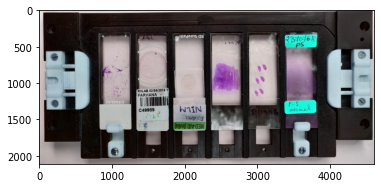

In [ ]:
image = cv2.imread('bright.jpg')
plt.imshow(image)

**Defining Mask**

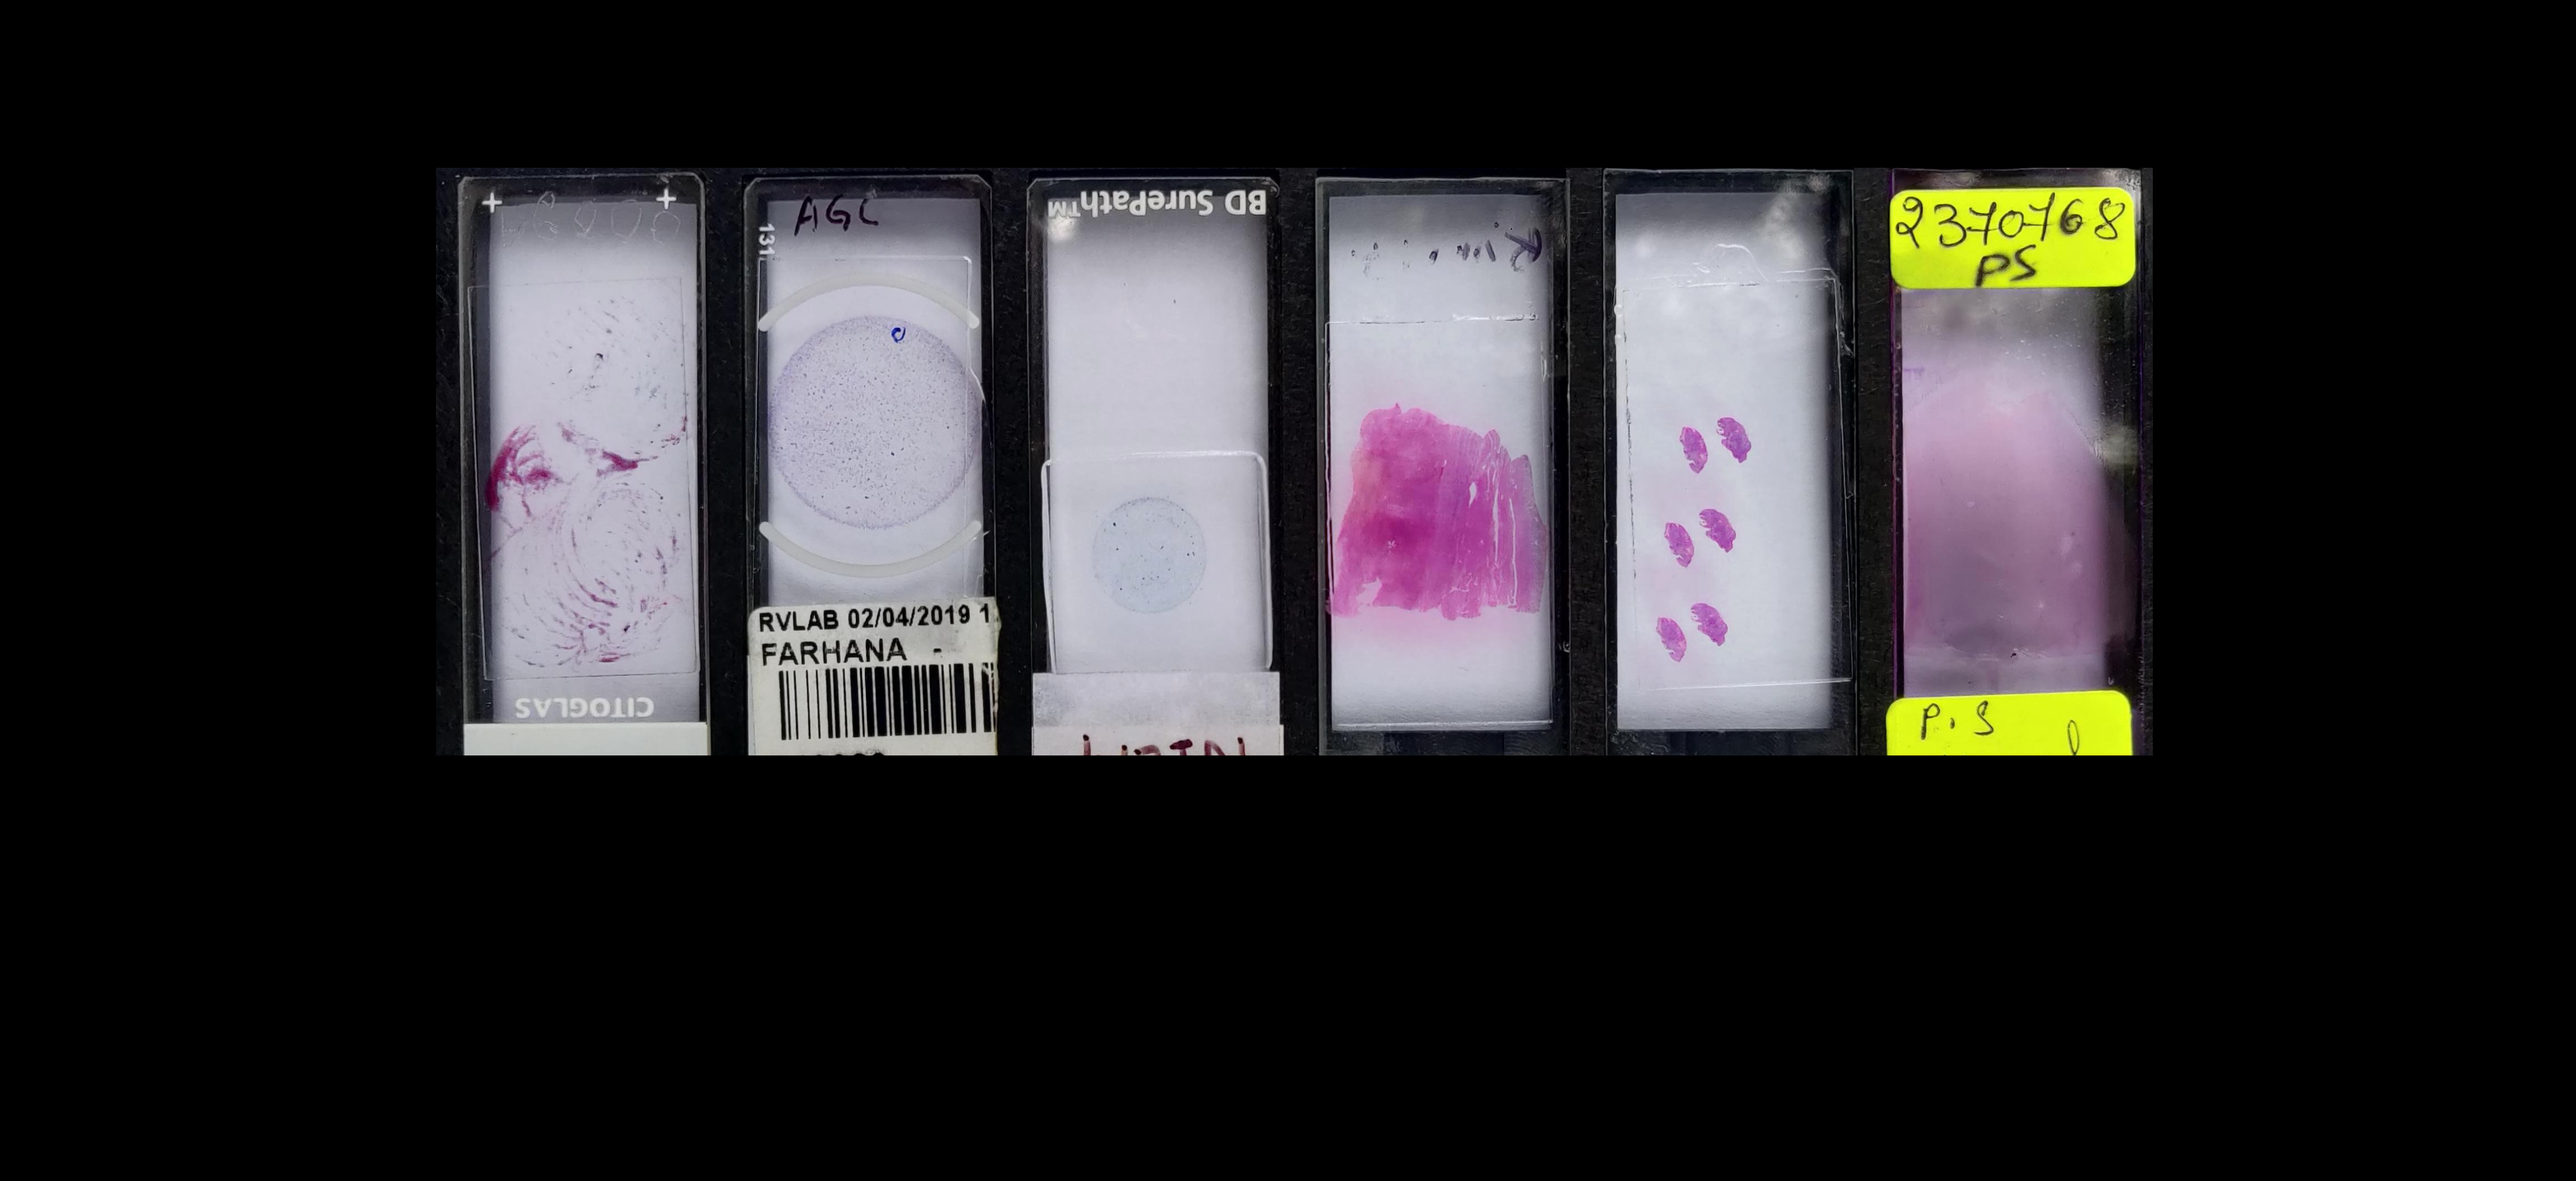

True

In [ ]:
mask = np.zeros(image.shape[:2], dtype="uint8")
cv2.rectangle(mask, (780, 1350), (3850, 300), 255, -1)

masked = cv2.bitwise_and(image, image, mask=mask)
cv2_imshow(masked)
cv2.imwrite('Maskedimage.png',masked)

**Finding cover slips**

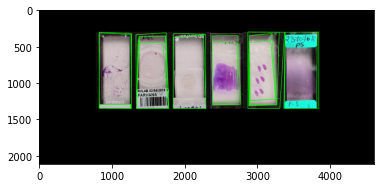

In [ ]:
import cv2 as cv2
import numpy as np
import matplotlib.pyplot as plt

#%matplotlib inline
def angle_cos(p0, p1, p2):
    d1, d2 = (p0-p1).astype('float'), (p2-p1).astype('float')
    return abs( np.dot(d1, d2) / np.sqrt( np.dot(d1, d1)*np.dot(d2, d2) ) )

def find_squares(img):
    img = cv2.GaussianBlur(img, (5, 5), 0)
    squares = []
    
    o=0
    i=0
    for gray in cv2.split(img):
        for thrs in range(0, 255, 26):
            if thrs == 0:
                bin = cv2.Canny(gray, 0, 50, apertureSize=5)
                bin = cv2.dilate(bin, None)
            else:
                _retval, bin = cv2.threshold(gray, thrs, 255, cv2.THRESH_BINARY)
            contours, _hierarchy = cv2.findContours(bin, cv2.RETR_LIST, cv2.CHAIN_APPROX_SIMPLE)
            image_number=0
            mask = np.zeros(bin.shape, dtype=np.uint8)

            
            for cnt in contours:
                cnt_len = cv2.arcLength(cnt, True)
                cnt = cv2.approxPolyDP(cnt, 0.02*cnt_len, True)
                x,y,w,h = cv2.boundingRect(cnt) 
                       
                       
                center = (x,y,w,h)
                if len(cnt) == 4 and cv2.contourArea(cnt) > 1000 and cv2.isContourConvex(cnt):
                    cnt = cnt.reshape(-1, 2)
                    max_cos = np.max([angle_cos( cnt[i], cnt[(i+1) % 4], cnt[(i+2) % 4] ) for i in range(4)])
                    #print(cnt)
                    a = (cnt[1][1] - cnt[0][1])
                   
                    if max_cos < 0.1 and a < img.shape[0]*0.8:
                       
                    #print (center)            
                     
                      #cv2.rectangle(img, (x, y), (x + w, y + h), (0, 255,0), 2)
                      
                       #cv2.drawContours(mask,contours,cnt,(255, 255, 255),-1) 
                      
                       #r = float(cv2.countNonZero(mask[y:y+h, x:x+w])) / (w * h)
                         
                        

                       # x,y,w,h = cv2.boundingRect(cnt)
                       # ROI = img[y:y+h, x:x+h]
                       # cv2.imwrite('ROI_{}.png'.format(image_number), ROI)
                        #image_number += 1
                       
                       
                       squares.append(cnt)
            #hash(tuple(squares))           
            #sq=set(squares)           

            #print(o,squares[o])
            #o=o+1    
              
            #print(i)        
             
    return squares
from google.colab.patches import cv2_imshow
dice = cv2.imread('Maskedimage.png')

squares = find_squares(dice)

cv2.drawContours(dice, squares, -1, (0, 255, 0), 5)


#x,y,w,h = cv2.boundingRect(cnt) 
#center = (x,y,w,h)

#print ("box1",img[u])
import numpy as np
ex=np.array([squares[8]],'int32')

path=r"Maskedimage.png"
im=cv2.imread(path)
#ima = np.zeros(im.shape[:-1]).dtype=np.uint8

#mask = np.zeros((4, 3))
#imj=cv2.fillConvexPoly(ima, ex,  (0,0,0))
c=cv2.boundingRect(ex)
x,y,w,h=c

#crop=im[y:y+h,x:x+w].copy()
#cv2_imshow(crop)
#cv2.imwrite("cover1.png",crop)
plt.imshow(dice)
#cv2.imwrite("roicover1.png",dice)
#cv2_imshow(imj)


**Finding sample Inside coverslip (pink region)**

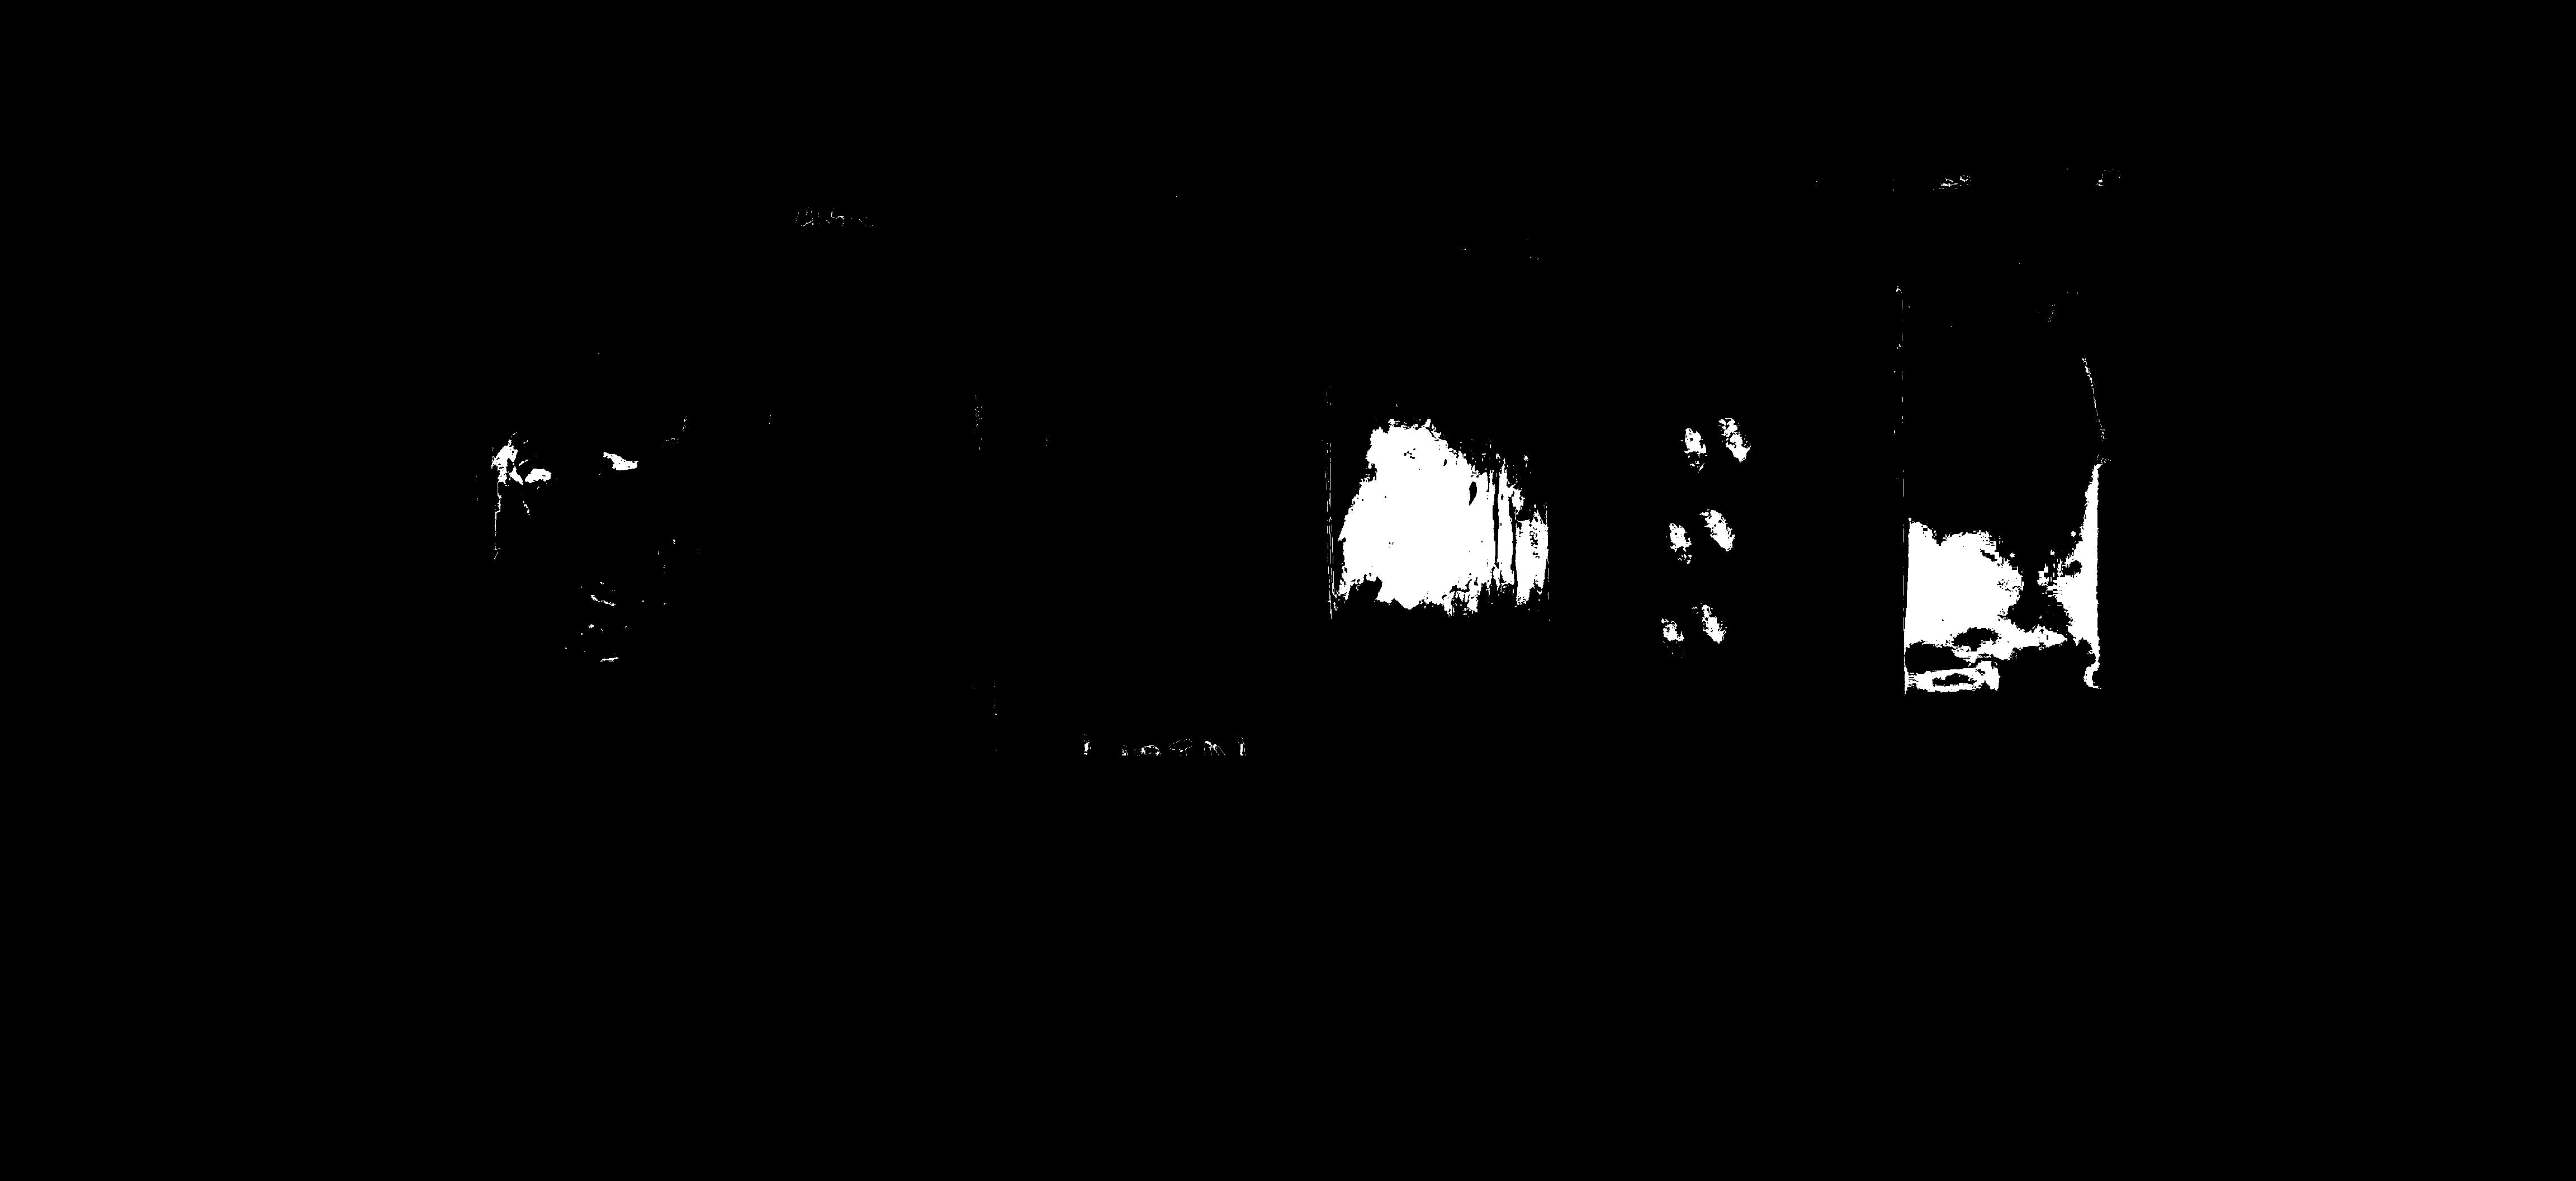

True

In [ ]:
thresholded_pink = cv2.inRange(masked, (60, 0, 110), (213, 105, 255))
cv2_imshow(thresholded_pink)
cv2.imwrite('ROIregion.png',thresholded_pink)

**Draw a contour over the pink region**

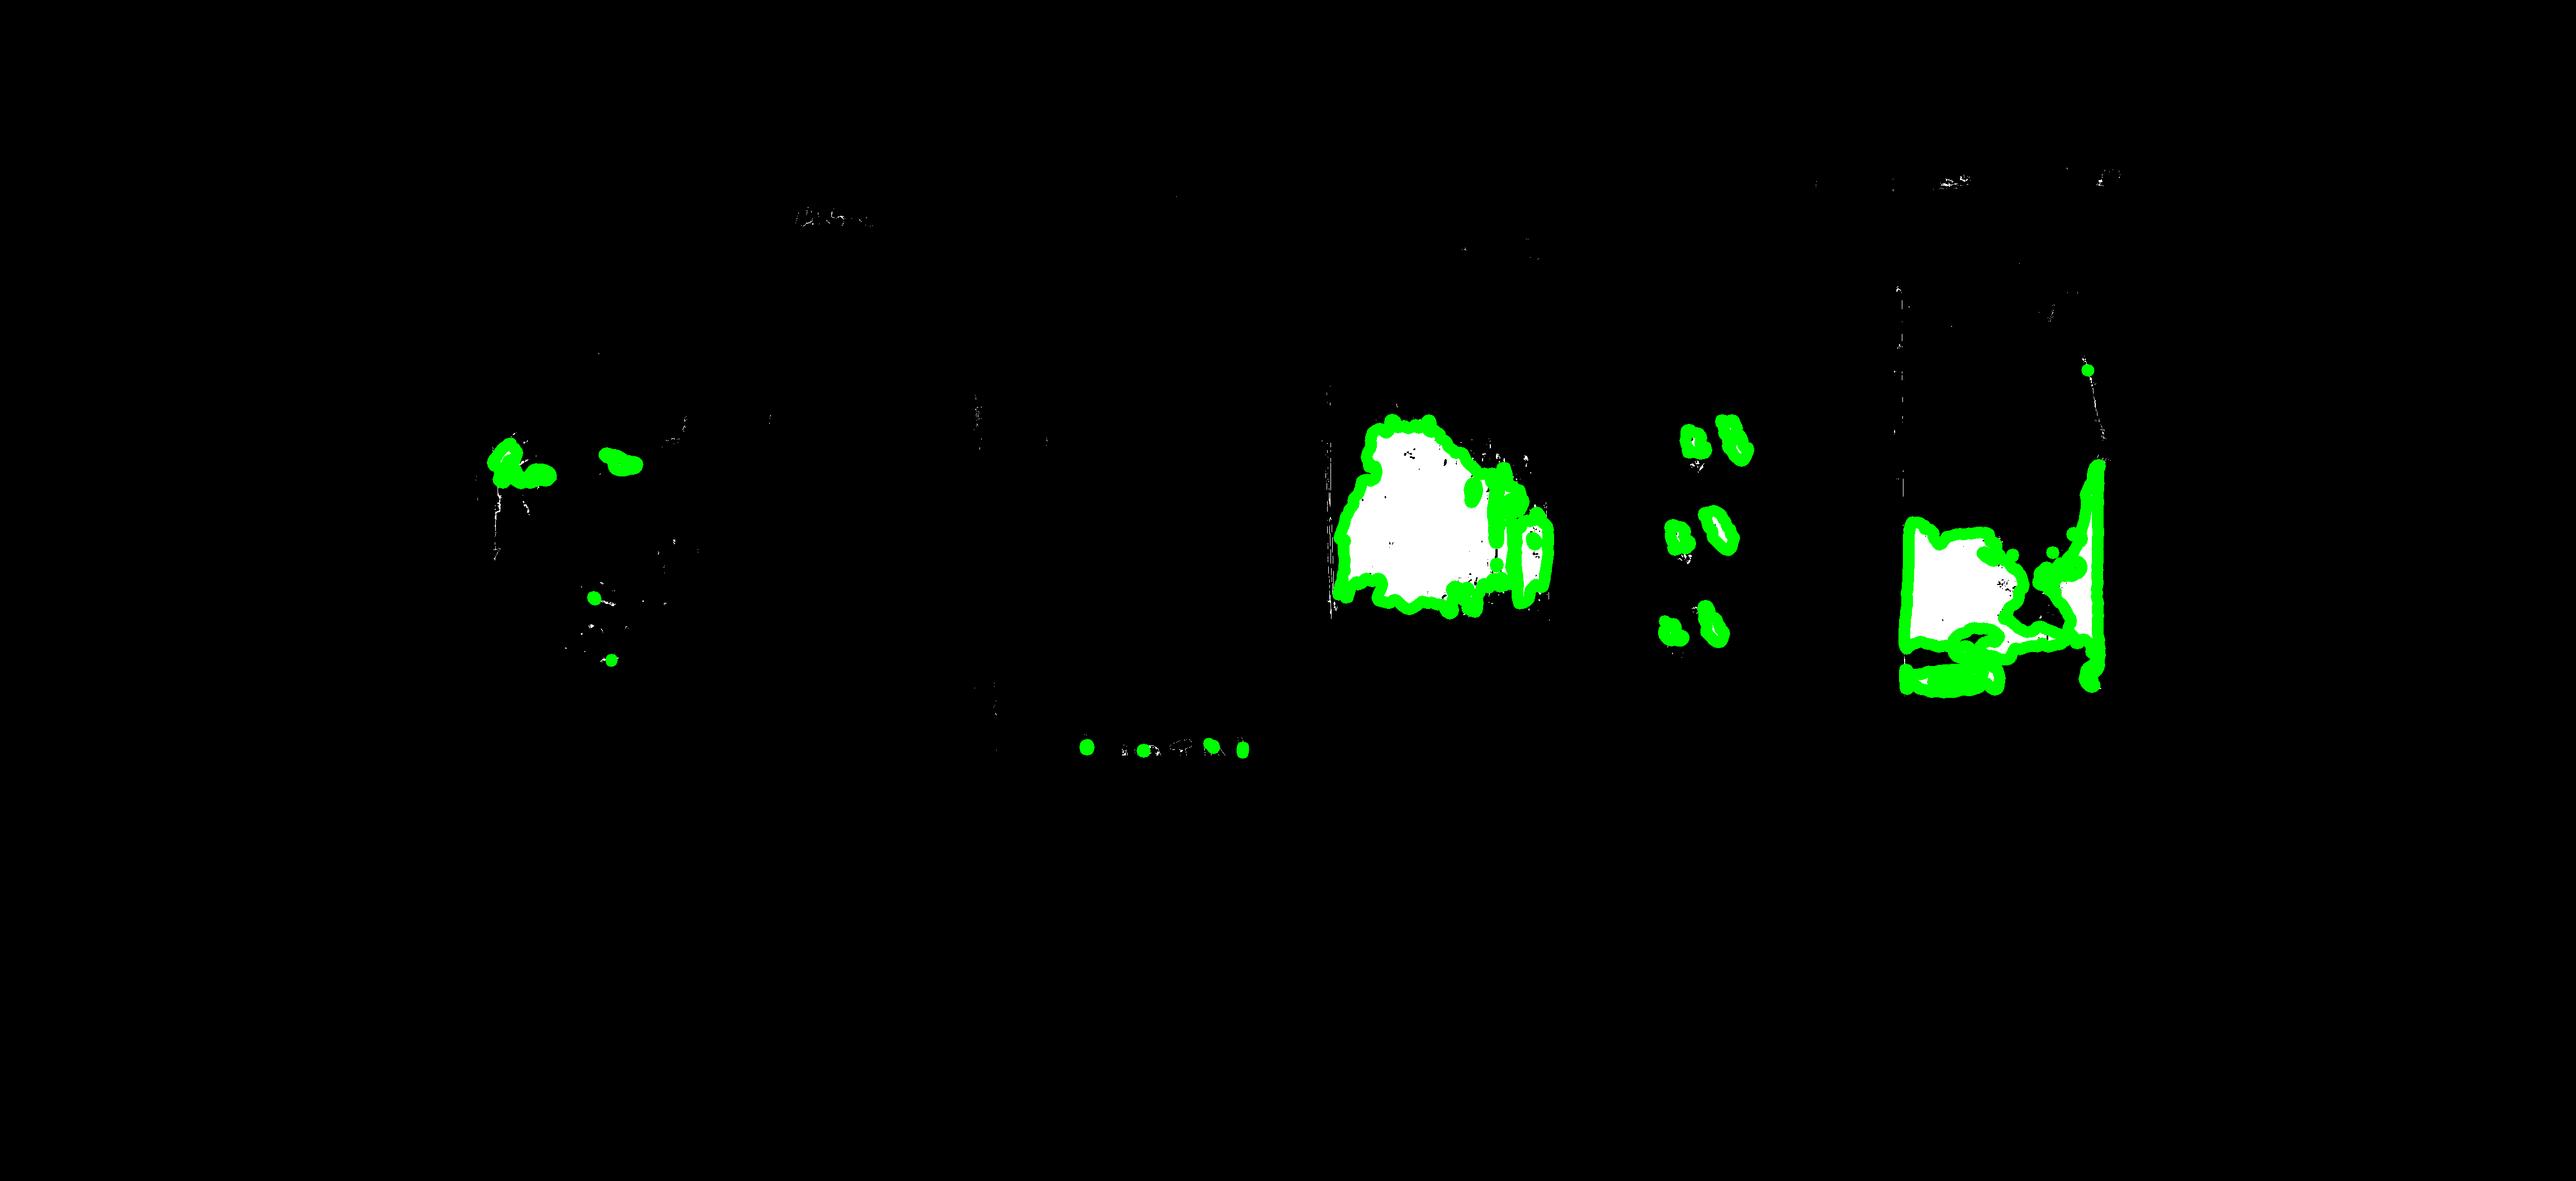

In [ ]:
import cv2 as cv
from google.colab.patches import cv_imshow


img = cv.imread("ROIregion.png")

gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)

blur = cv.blur(gray, (10,10))
ret, thresh = cv.threshold(blur, 1, 255, cv.THRESH_OTSU)

contours, heirarchy = cv.findContours(thresh, cv.RETR_TREE, cv.CHAIN_APPROX_SIMPLE)

cv.drawContours(img, contours, -1, (0,255,0), 20)



cv_imshow( img)
#cv_imshow(thresh)
if cv.waitKey(0):
    cv.destroyAllWindows()